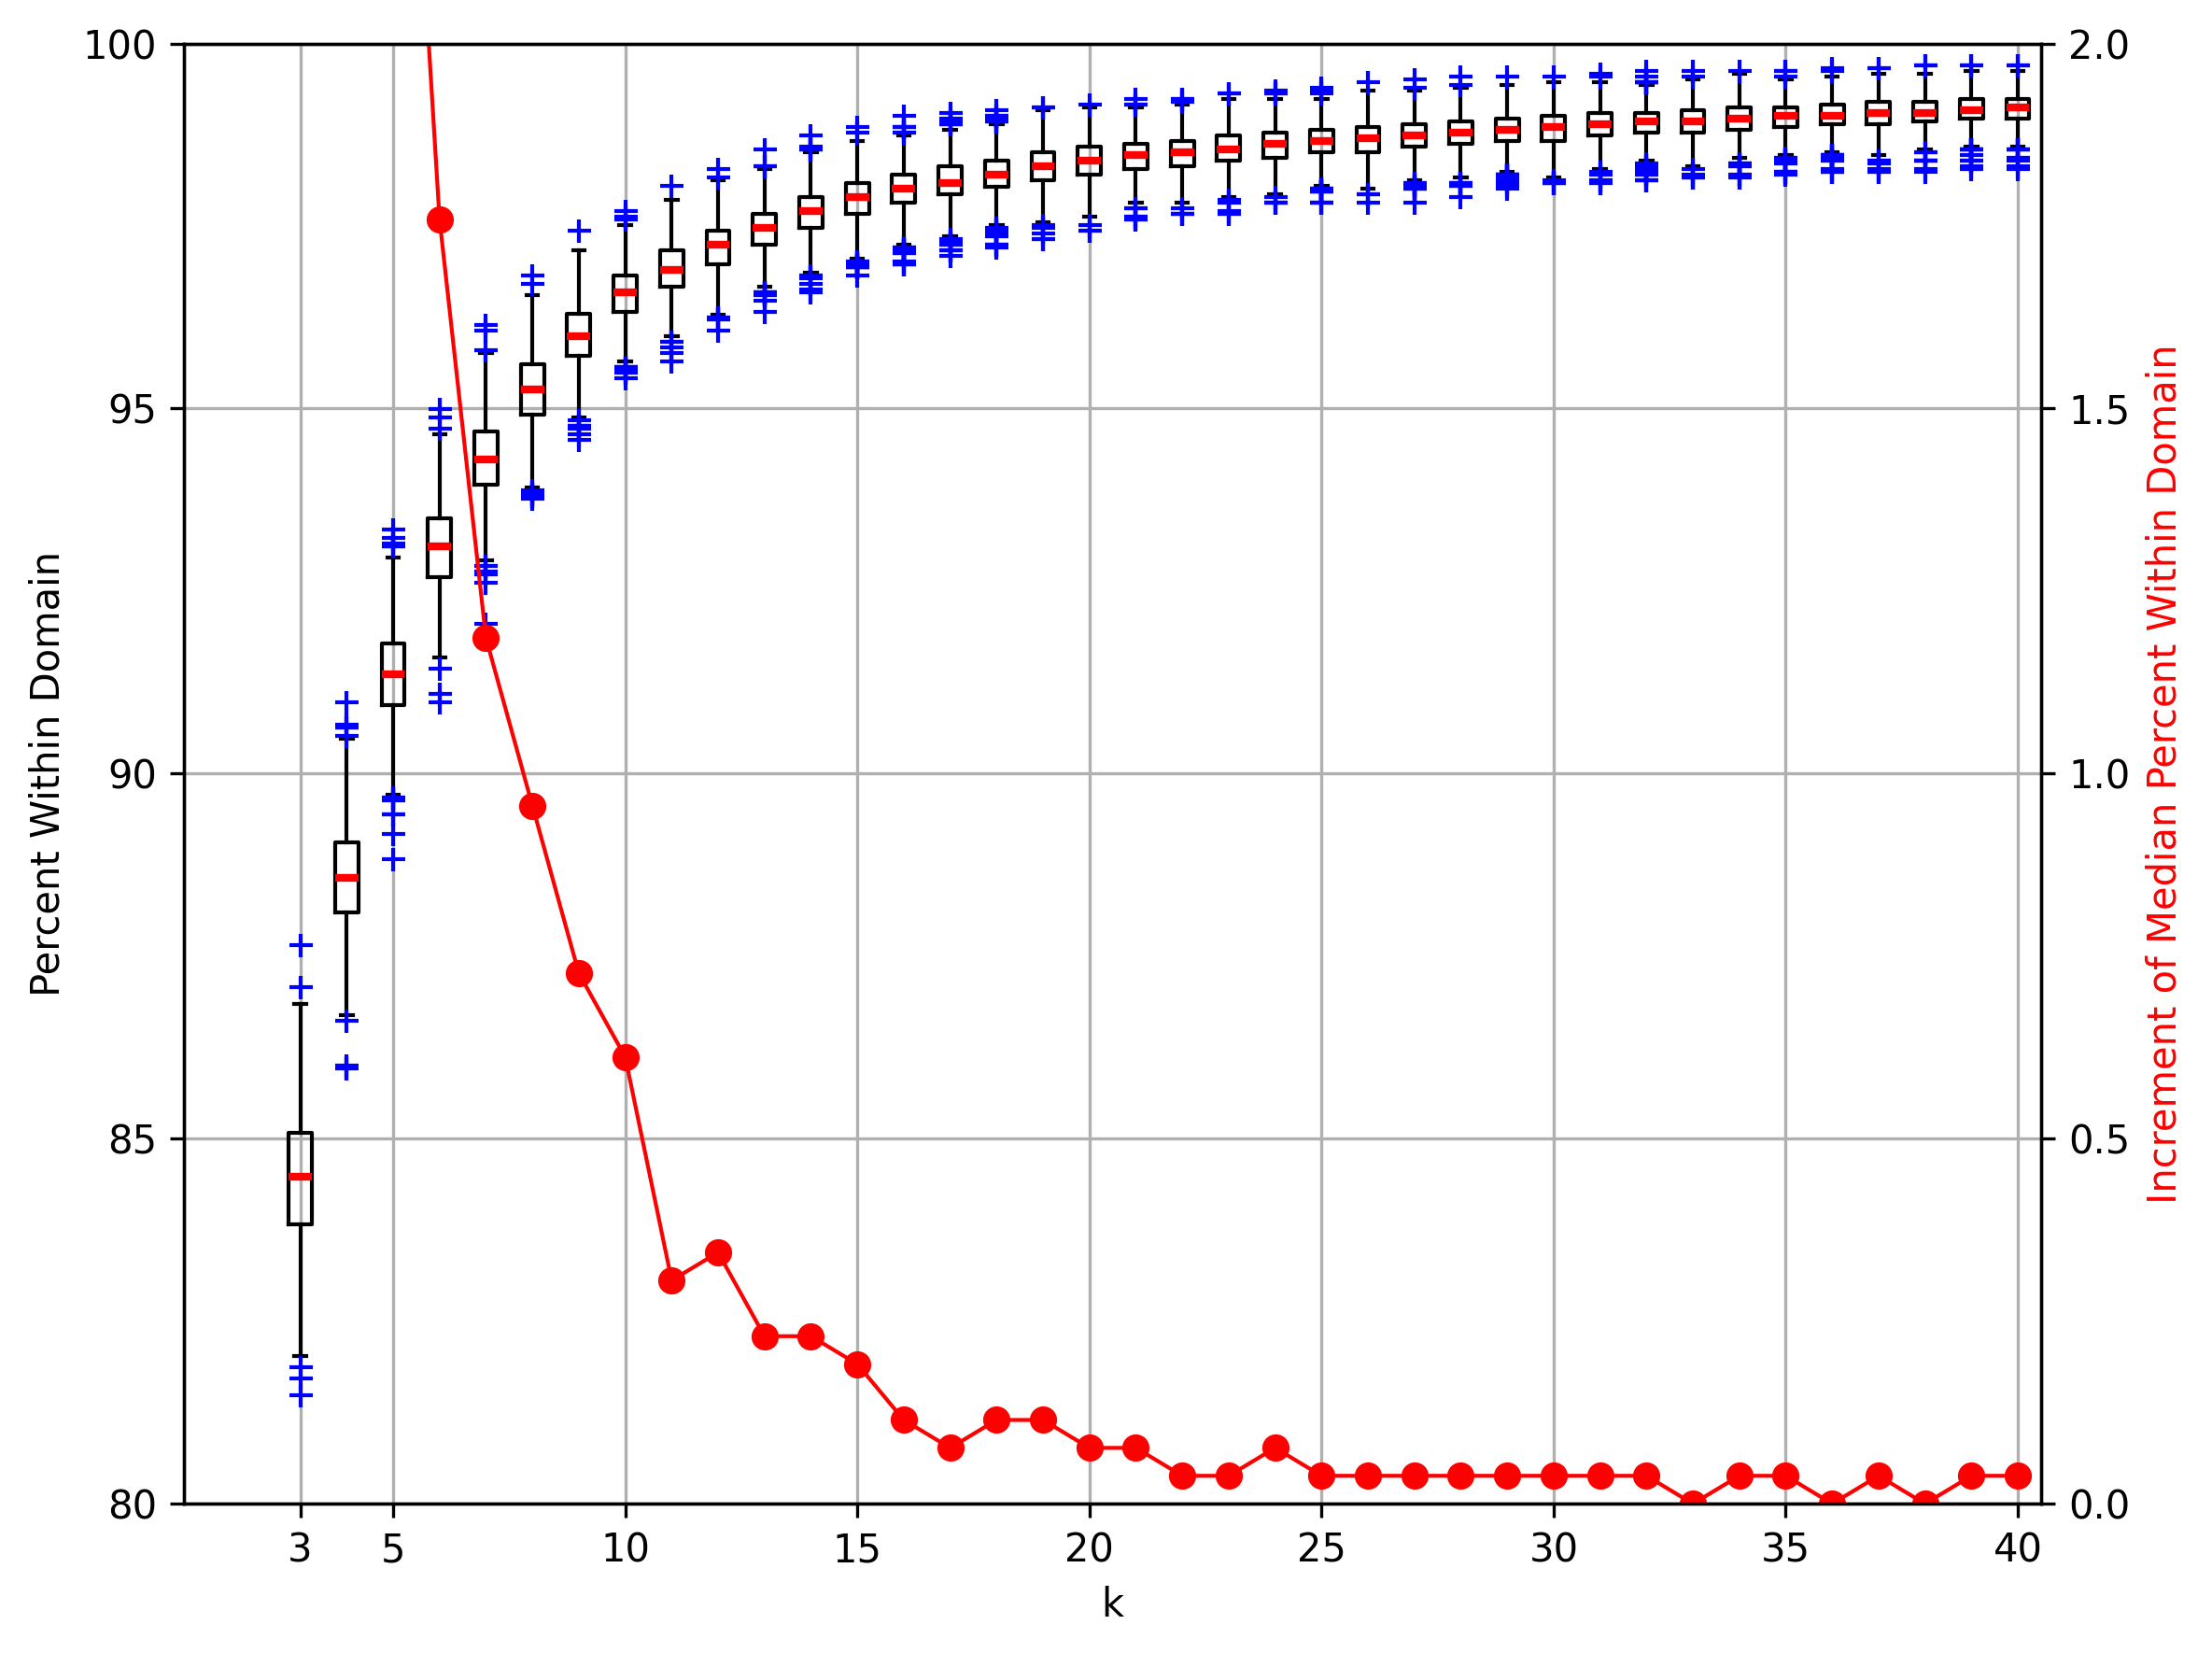

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("knn_iteration_details.csv")

# Calculate the percentage of data within the domain
df['percent_within_domain'] = df['within_domain'] / (df['within_domain'] + df['out_of_domain']) * 100

# Prepare the data for the boxplot
boxplot_data = []
medians = []
for k_value in df['k'].unique():
    k_subset = df[df['k'] == k_value]['percent_within_domain']
    boxplot_data.append(k_subset.values)
    medians.append(k_subset.median())

# Calculate median increments
median_increments = [medians[i] - medians[i - 1] for i in range(1, len(medians))]

# Plotting the box and whisker plot for each k value along with the increments of the median
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=300)

# Boxplot for percent within domain, with outliers as orange plus signs
flierprops = {'marker': '+', 'markerfacecolor': 'blue', 'markeredgecolor': 'blue', 'markersize': 6}
medianprops = {'color': 'red', 'linewidth': 2}
ax1.boxplot(boxplot_data, tick_labels=df['k'].unique(), flierprops=flierprops, medianprops=medianprops)
ax1.set_xlabel('k')
ax1.set_ylabel('Percent Within Domain', color='black')
ax1.set_xticks([3, 5, 10, 15, 20, 25, 30, 35, 40])
ax1.set_xticklabels([3, 5, 10, 15, 20, 25, 30, 35, 40])
ax1.set_ylim(80, 100)
ax1.set_yticks(range(80, 101, 5))
ax1.grid()

# Plotting the increments of the median percentage on the same graph
ax2 = ax1.twinx()
ax2.plot(df['k'].unique()[1:], median_increments, marker='o', linestyle='-', color='r', linewidth=1)
ax2.set_ylabel('Increment of Median Percent Within Domain', color='r')
ax2.set_ylim(0, 2)
ax2.set_yticks([i * 0.5 for i in range(5)])

plt.tight_layout()
plt.savefig("k-search-box-plot.png")
plt.show()